In [235]:
import networkx as nx
import matplotlib.pyplot


In [236]:
cd C:\Users\christy\Documents

C:\Users\christy\Documents


In [237]:
G=nx.read_edgelist("348.edges")

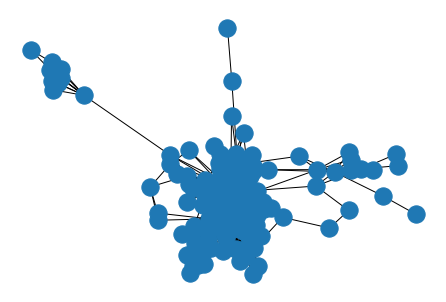

In [238]:
nx.draw(G)

In [239]:
n=len(nx.nodes(G))

In [240]:
n

224

In [241]:
for i in nx.nodes(G):
    print((i))
    
    

436
428
450
531
538
404
565
412
471
461
544
414
465
546
547
475
446
536
398
367
452
560
493
361
359
402
520
567
542
510
521
559
557
376
555
500
469
516
378
482
418
506
514
545
525
484
492
479
373
483
173
549
460
517
395
370
396
416
368
503
423
457
477
524
364
441
400
548
515
434
496
382
474
451
409
526
363
371
420
432
448
563
508
440
444
523
561
365
507
397
439
497
513
387
408
512
394
419
527
443
453
403
504
422
413
495
553
458
426
540
470
519
511
556
558
372
392
445
417
566
353
490
464
552
488
374
476
533
355
463
388
438
442
375
491
354
543
456
455
366
467
572
539
424
537
391
425
360
421
430
427
407
357
568
405
473
431
350
369
466
429
551
381
410
486
459
487
569
494
481
502
570
362
198
399
352
489
389
501
564
454
351
435
437
528
518
380
390
462
532
498
509
554
449
541
415
571
480
468
406
505
433
478
349
535
385
534
562
529
522
485
34
356
411
384
393
530
472
386
499
379
401
377
383


In [242]:
G1=nx.read_edgelist("facebook_combined.txt")

In [243]:
from operator import itemgetter
degree=G.degree()
degree=list(degree)
(degree.sort(key=lambda x:x[1]))




a=degree[-1]
print(a)


('376', 99)


In [244]:
#find ego net of lagest hub
hub_ego=nx.ego_graph(G,a[0])
type(hub_ego)
print(hub_ego.nodes())


['523', '515', '482', '367', '461', '438', '513', '378', '526', '511', '442', '446', '387', '355', '366', '463', '483', '563', '524', '354', '458', '570', '420', '546', '545', '436', '434', '491', '473', '444', '538', '519', '359', '450', '376', '390', '400', '388', '405', '431', '413', '557', '527', '506', '363', '360', '517', '488', '520', '361', '555', '428', '395', '544', '559', '507', '514', '423', '497', '396', '417', '439', '471', '475', '374', '397', '547', '490', '531', '394', '496', '410', '412', '432', '373', '452', '353', '492', '370', '502', '556', '419', '481', '465', '500', '456', '391', '489', '548', '561', '567', '542', '402', '460', '566', '553', '426', '414', '487', '525']


100
1812


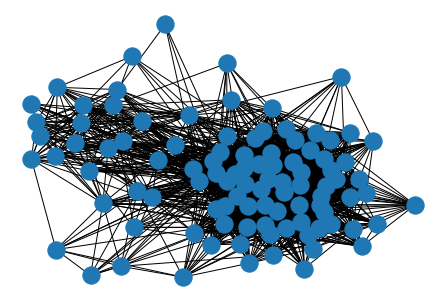

In [245]:
#print largset hub ego net
nx.draw(hub_ego)
print(len(hub_ego.nodes()))
print(len(hub_ego.edges()))

In [246]:
pos=nx.spring_layout(hub_ego)

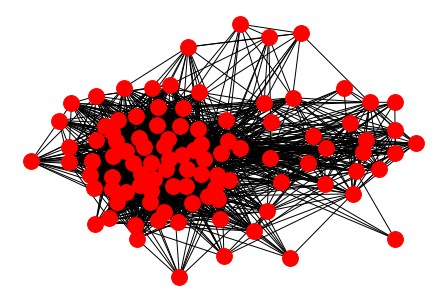

In [247]:
nx.draw(hub_ego,pos,node_color='r',node_size=250,with_labels=False)


In [248]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
import pandas as pd


In [249]:
def power_law(x,c,theta):
    return c*math.pow(x,theta)
    

#value=power_law(10,2,2)
#print(value)

In [250]:
#find the ego net of every node
total=0
list1=[]
list2=[]
for i in degree:
    a=i[0]
    sub_ego=nx.ego_graph(G,a)
    no_of_nodes=len(sub_ego.nodes())
    no_of_edges=len(sub_ego.edges())
    ABC=nx.betweenness_centrality(sub_ego)
    x=no_of_nodes
    y=no_of_edges
    #plt.plot(x,y,'ro',color='blue')
    #print("node_label={}".format(a))
    #print("nodes={}".format(no_of_nodes))
    #print("edges={}".format(no_of_edges))
    #print("ABC={}".format(ABC))
    #print('*******************')
    #plt.scatter(x,y)
    #plt.xlabel("N")
    #plt.ylabel("E")
    #plt.title("N VS E")
    #plt.plot(x,y)
    #plt.show()
    param,cov_param=curve_fit(power_law,x,y,bounds=([0,1.10],[1,1.66]))
    ans= power_law(x,param[0],param[1]) 

    
    
    #print(ans)
    #plt.plot(x, y, 'ro', color ='blue') 
    #plt.plot(x, ans, '.', color ='red') 
    
    #plt.legend() 
    #plt.show()
    a_score_i=((max(y,(param[0]*math.pow(x,param[1]))))/(min(y,(param[0]*math.pow(x,param[1])))))*(math.log(abs(y-(param[0]*math.pow(x,param[1])))+1))
    #print(a_score_i)
    #dict.update({i[0]:a_score_i})
    j=i[0]
    list1.append(j)
    list2.append(a_score_i)
    #print(list2[-1])
    
    total=total+a_score_i
    avg=total/n
    
cols=['node','score']
df=pd.DataFrame(np.column_stack([list1,list(list2)]),columns=cols)


df




    

,node,score
0,443,4.190647828837924e-11
1,468,4.190647828837924e-11
2,379,4.190647828837924e-11
3,401,4.190647828837924e-11
4,377,4.190647828837924e-11
5,448,2.2178703318249846e-11
6,454,2.2178703318249846e-11
7,571,2.2178703318249846e-11
8,356,1.3322676295501878e-15
9,411,1.3322676295501878e-15


In [251]:
#if(df['score']>0):
#    print(df['node'])
df['score']=pd.Series.to_list((df['score']))

print(type(df['score']))

<class 'pandas.core.series.Series'>


In [252]:
print(avg)

0.9707927230120655


In [253]:
print((df.columns))

Index(['node', 'score'], dtype='object')


In [254]:
#print(df.loc[df['node']==373])
#df.loc[df['column_name'] == some_value]
#df.loc[lambda df:df['node']==373]
#df.loc[df['shield'] > 6]
df1=(df.loc[df['score']<'1.870824923588359e-13'])
df1
print((df1.columns))
print(df1['node'])

Index(['node', 'score'], dtype='object')
8      356
9      411
10     386
12     383
13     552
16     406
17      34
18     384
19     530
22     464
26     485
27     472
36     393
38     540
41     478
51     198
54     532
58     491
60     502
64     382
66     568
67     381
69     490
72     440
73     521
75     410
76     569
77     509
84     424
85     551
      ... 
107    539
114    451
115    519
116    421
117    359
119    458
124    420
126    481
128    512
129    546
135    547
141    422
150    479
152    555
161    439
164    463
165    360
169    545
173    397
177    404
184    515
186    432
187    408
188    493
192    419
205    460
209    465
214    563
219    373
220    497
Name: node, Length: 73, dtype: object


In [255]:
total=0
list1=[]
list2=[]
def func():
    for i in degree:
        global total
        a=i[0]
        sub_ego=nx.ego_graph(G,a)
        no_of_nodes=len(sub_ego.nodes())
        no_of_edges=len(sub_ego.edges())
        ABC=nx.betweenness_centrality(sub_ego)
        x=no_of_nodes
        y=no_of_edges
        #plt.plot(x,y,'ro',color='blue')
        #print("node_label={}".format(a))
        #print("nodes={}".format(no_of_nodes))
        #print("edges={}".format(no_of_edges))
        #print("ABC={}".format(ABC))
        #print('*******************')
        #plt.scatter(x,y)
        #plt.xlabel("N")
        plt.ylabel("E")
        plt.title("N VS E")
        #plt.plot(x,y)
        #plt.show()
        param,cov_param=curve_fit(power_law,x,y,bounds=([0,1.10],[1,1.66]))
        ans= power_law(x,param[0],param[1]) 



        #print(ans)
        plt.plot(x, y, 'ro', color ='blue') 
        plt.plot(x, ans, '.', color ='red') 

        #plt.legend() 
        #plt.show()
        a_score_i=((max(y,(param[0]*math.pow(x,param[1]))))/(min(y,(param[0]*math.pow(x,param[1])))))*(math.log(abs(y-(param[0]*math.pow(x,param[1])))+1))
        #print(a_score_i)
        #dict.update({i[0]:a_score_i})
        list1.append([i])
        list2.append(a_score_i)
        print(list2)

        total=total+a_score_i
        #avg=total/n
        return(list2)

    

[4.190647828837924e-11]


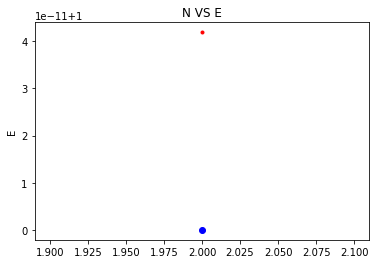

In [256]:
l=func()

In [257]:
print(total)

4.190647828837924e-11


In [258]:
avg=total/n

In [259]:
avg

1.870824923588359e-13